You are given a positive integer k. You are also given:

    a 2D integer array rowConditions of size n where rowConditions[i] = [abovei, belowi], and
    a 2D integer array colConditions of size m where colConditions[i] = [lefti, righti].

The two arrays contain integers from 1 to k.

You have to build a k x k matrix that contains each of the numbers from 1 to k exactly once. The remaining cells should have the value 0.

The matrix should also satisfy the following conditions:

    The number abovei should appear in a row that is strictly above the row at which the number belowi appears for all i from 0 to n - 1.
    The number lefti should appear in a column that is strictly left of the column at which the number righti appears for all i from 0 to m - 1.

Return any matrix that satisfies the conditions. If no answer exists, return an empty matrix.

 

Example 1:

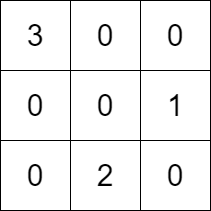

Input: k = 3, rowConditions = [[1,2],[3,2]], colConditions = [[2,1],[3,2]]
Output: [[3,0,0],[0,0,1],[0,2,0]]
Explanation: The diagram above shows a valid example of a matrix that satisfies all the conditions.
The row conditions are the following:
- Number 1 is in row 1, and number 2 is in row 2, so 1 is above 2 in the matrix.
- Number 3 is in row 0, and number 2 is in row 2, so 3 is above 2 in the matrix.
The column conditions are the following:
- Number 2 is in column 1, and number 1 is in column 2, so 2 is left of 1 in the matrix.
- Number 3 is in column 0, and number 2 is in column 1, so 3 is left of 2 in the matrix.
Note that there may be multiple correct answers.

Example 2:

Input: k = 3, rowConditions = [[1,2],[2,3],[3,1],[2,3]], colConditions = [[2,1]]
Output: []
Explanation: From the first two conditions, 3 has to be below 1 but the third conditions needs 3 to be above 1 to be satisfied.
No matrix can satisfy all the conditions, so we return the empty matrix.

 

Constraints:

    2 <= k <= 400
    1 <= rowConditions.length, colConditions.length <= 104
    rowConditions[i].length == colConditions[i].length == 2
    1 <= abovei, belowi, lefti, righti <= k
    abovei != belowi
    lefti != righti



In [ ]:
class Solution:
    def buildMatrix(self, k: int, rowConditions: List[List[int]], colConditions: List[List[int]]) -> List[List[int]]:
        order_rows = self.__topo_sort(rowConditions, k)
        order_columns = self.__topo_sort(colConditions, k)
        if not order_rows or not order_columns:
            return []
        matrix = [[0] * k for _ in range(k)]
        for i in range(k):
            for j in range(k):
                if order_rows[i] == order_columns[j]:
                    matrix[i][j] = order_rows[i]
        return matrix

    def __topo_sort(self, edges, n):
        adj = [[] for _ in range(n + 1)]
        deg = [0] * (n + 1)
        order = []
        for x in edges:
            adj[x[0]].append(x[1])
            deg[x[1]] += 1
        q = deque()
        for i in range(1, n + 1):
            if deg[i] == 0:
                q.append(i)
        while q:
            f = q.popleft()
            order.append(f)
            n -= 1
            for v in adj[f]:
                deg[v] -= 1
                if deg[v] == 0:
                    q.append(v)
        if n != 0:
            return []
        return order